### Diabetes Dataset

The target is a `quantitative` measure of disease progression one year after baseline.   
The `features` are: age, sex, body mass index, average blood, etc.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Diabetes dataset
dataset = load_diabetes()
X = dataset.data
y = dataset.target
features = dataset.feature_names

# Describe dataset
print("Keys:", dataset.keys())
print("Shape:", dataset['data'].shape)
print("Target values examples:", dataset.target[0:7])
print(dataset['DESCR'])

Keys: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Shape: (442, 10)
Target values examples: [151.  75. 141. 206. 135.  97. 138.]
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      

### Continuous Values

The target values are `continuous`, not categorical.  
We need to divide the target values into two `categories`.  

1 represents target value `greater` than the mean target value.  
0 represents target value `less` than or equal.  

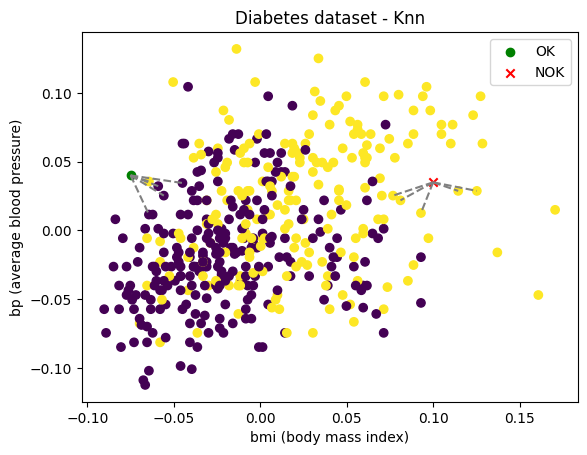

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Diabetes dataset
dataset = load_diabetes()
X = dataset.data
y = dataset.target
features = dataset.feature_names

# Select 2 features to plot (bmi, bp)
X = X[:, [2, 3]]  

# Make the target categorical (convert the target variable into a binary format)
# If the value is greater than the mean, assign 1 otherwise 0
y_binary = np.where(y > y.mean(), 1, 0)   

# Class names (0 is 'OK', 1 is 'NOK')
class_names = ['OK', 'NOK']

# KNN Algorithm
def knn(x_unknown, k=5):
    distances = np.sqrt(np.sum((X - x_unknown)**2, axis=1))

    keys = np.argsort(distances)
    knn_keys = keys[:k]

    knn_classes = y_binary[knn_keys]
    knn_classes = knn_classes.astype(int)

    knn_most_common_class = np.bincount(knn_classes).argmax()
    knn_class = class_names[knn_most_common_class]
    return knn_class, knn_keys

# Unknown points
xA = np.array([-0.075, 0.040])
xB = np.array([0.10, 0.035])
k_nearest = 5 # number of nearest neighbors (k=5)

# Predictions
knn_classA, knn_keysA = knn(xA, k_nearest)
knn_classB, knn_keysB = knn(xB, k_nearest)


# Plot the two unknown points and dataset points
fig, ax = plt.subplots()
ax.set_xlabel('bmi (body mass index)')
ax.set_ylabel('bp (average blood pressure)') 

plt.scatter(X[:, 0], X[:, 1], c=y_binary)
plt.scatter(xA[0], xA[1], marker='o', color='g', label=knn_classA)
plt.scatter(xB[0], xB[1], marker='x', color='r', label=knn_classB)

# Plot lines to the nearest points
for i in knn_keysA:
    plt.plot((xA[0], X[i][0]), (xA[1], X[i][1]), color='gray', linestyle='--')
for i in knn_keysB:
    plt.plot((xB[0], X[i][0]), (xB[1], X[i][1]), color='gray', linestyle='--')

plt.title('Diabetes dataset - Knn')
plt.legend()
plt.show()